In [1]:
# import dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) 
from sklearn import neighbors, preprocessing, metrics, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# Preprocessing data

In [2]:
# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data = data.data , columns = data.feature_names)
X = df.copy()
y= data.target
# overview of the datasetb
df['malignant'] = data.target
display(df.shape)
display(df.head())

(569, 31)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

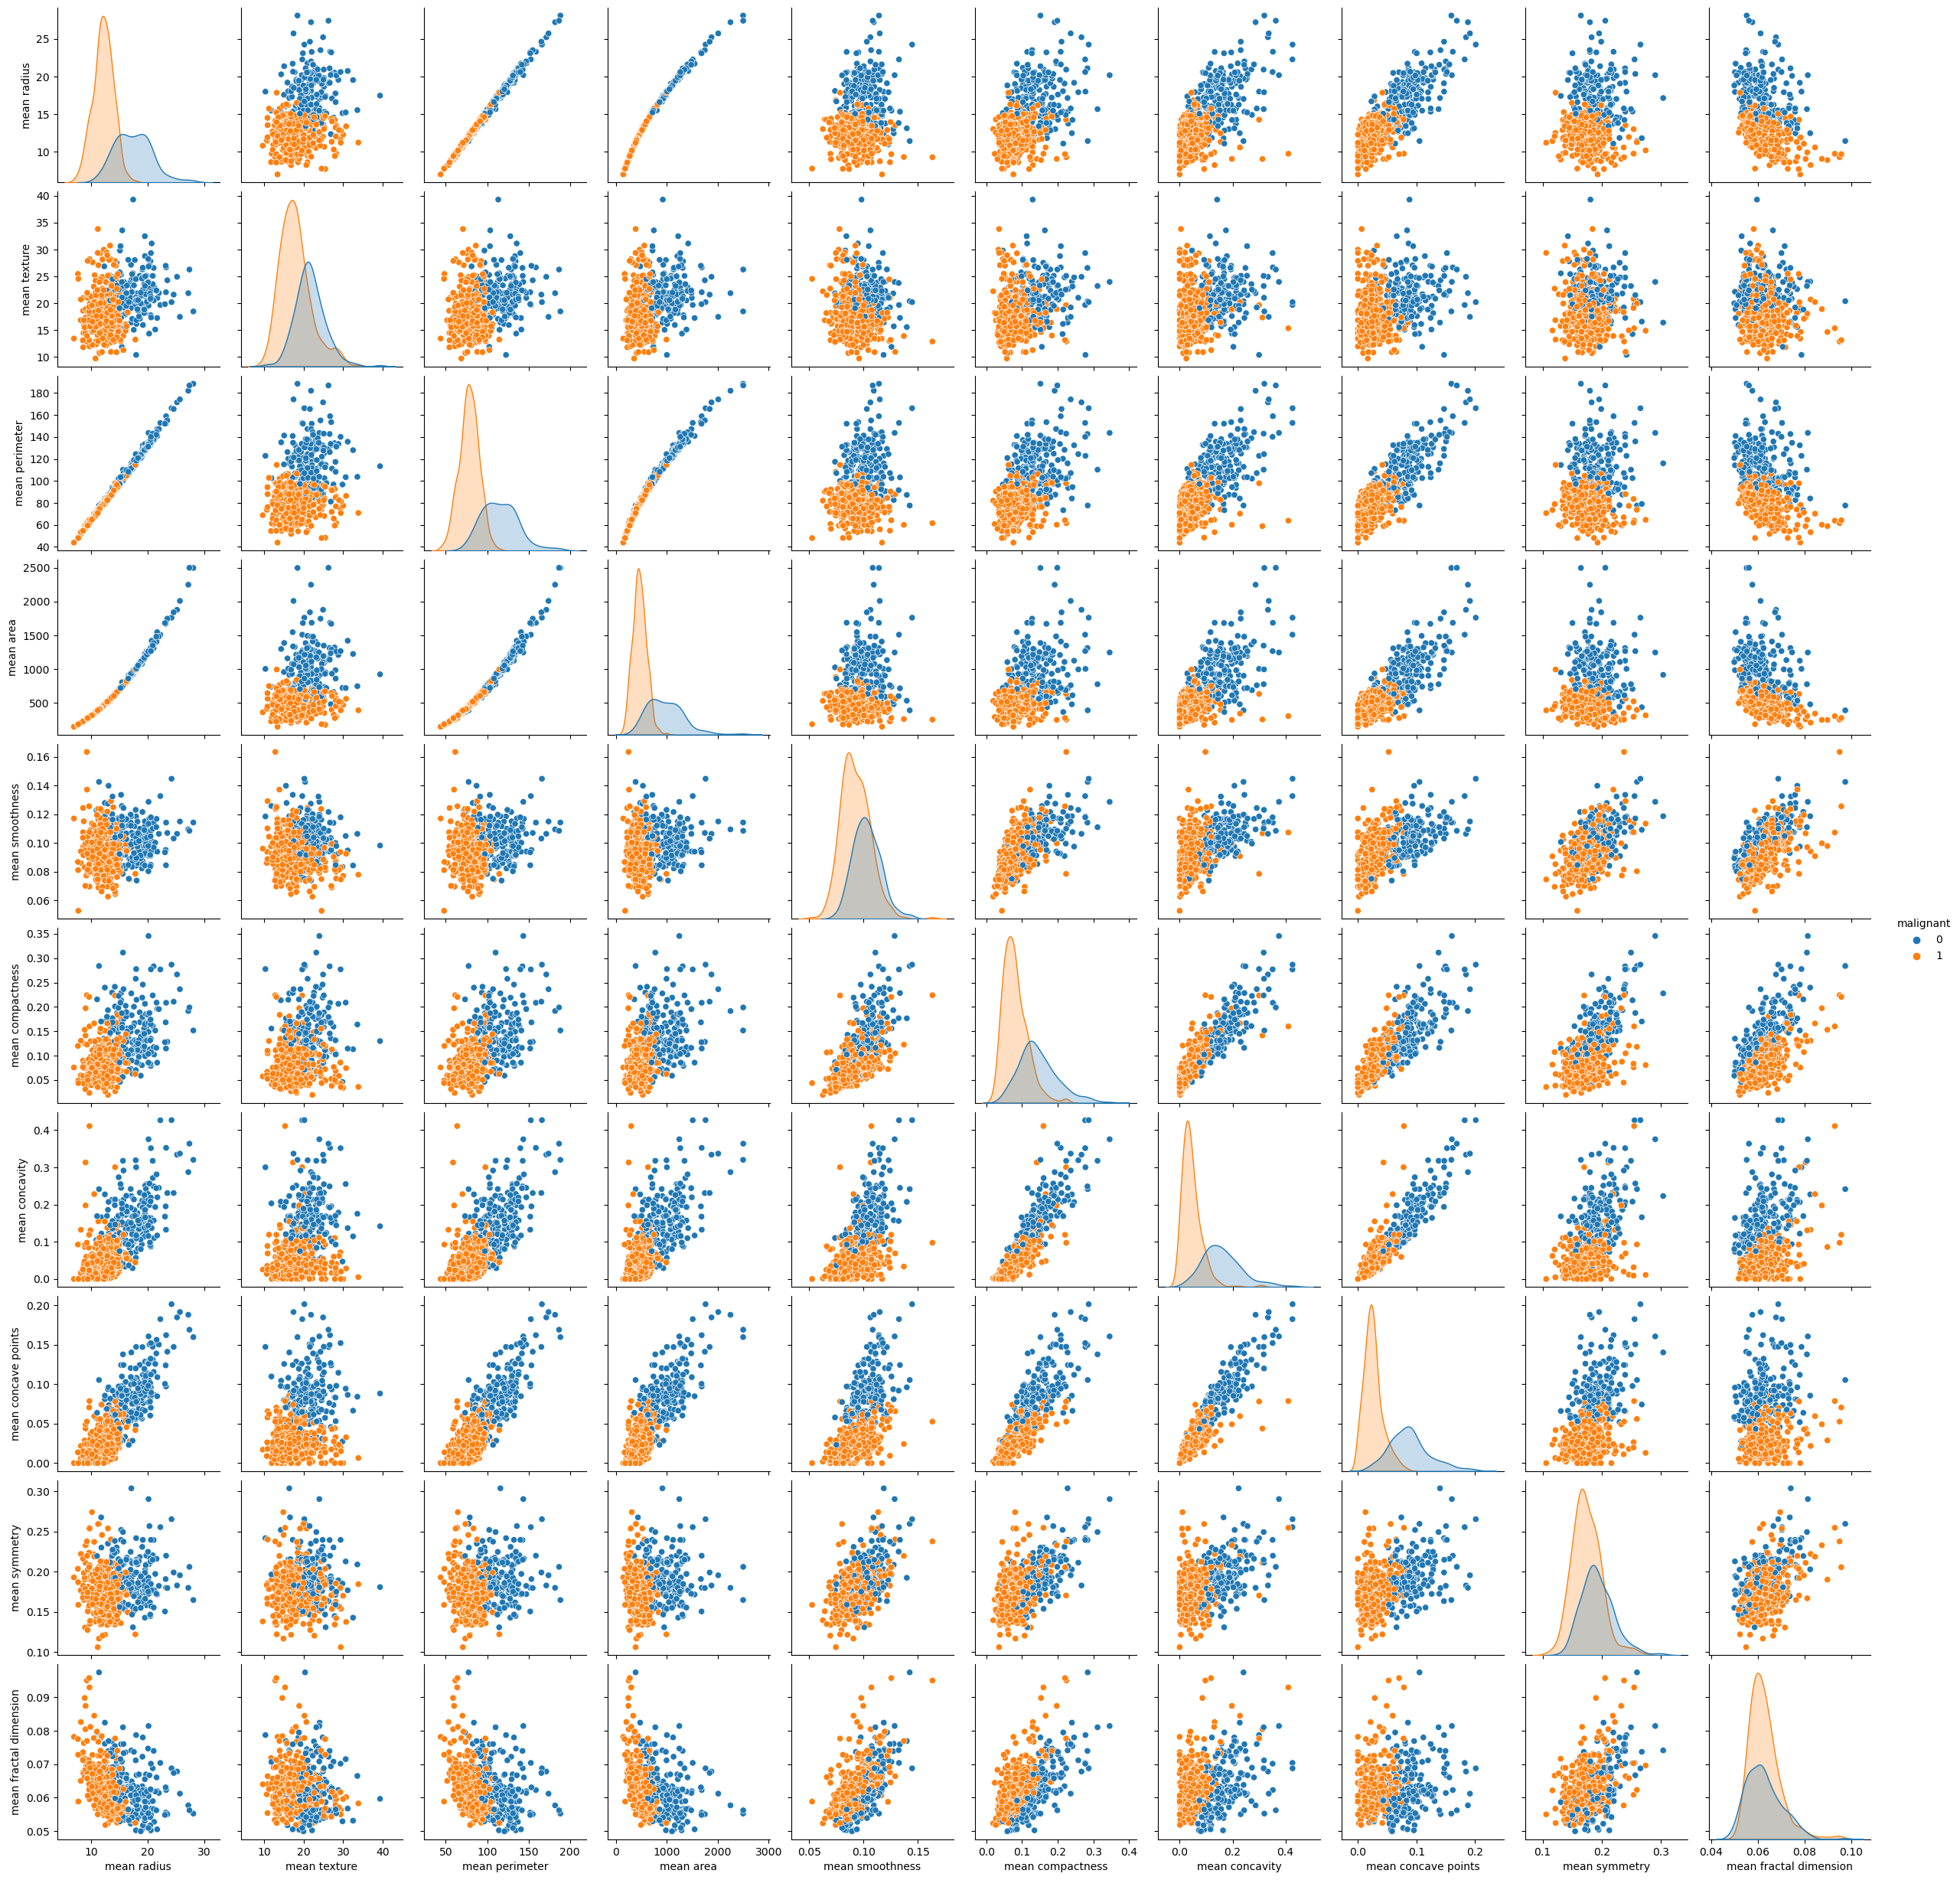

In [3]:
# getting an overview of the data through the subset of means columns
mean_cols = [c for c in df.columns if "mean" in c or c == 'malignant']
sns.pairplot(df[mean_cols], hue='malignant')

It looks like there are some clear boundaries of the classes in the pairwise relationships

In [4]:
# partition data 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=103)

# scale features for KNN 
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training
Evaluating the performance of each with 
- accuracy
- precision
- recall
- f1-score

Plus **confusion matrix for each model**

Ablation study - effect of modfying key hyperparameters on performance

In [12]:
def plot_metrics(metric_dict, model_name):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
    fig.suptitle(f'''Performance metrics for {model_name} with variable {metric_dict['key_hyperparameter']}''')
    ax1.plot(metric_dict['n_range'], metric_dict['train_err'], label='Training Error', marker='o')
    ax1.plot(metric_dict['n_range'], metric_dict['test_err'], label='Testing Error', marker='x')
    ax1.set_title(f'''Error rate vs number of {metric_dict['key_hyperparameter']}''')
    ax1.set_xlabel(f'''Number of {metric_dict['key_hyperparameter']}''')
    ax1.set_ylabel('Error rate')
    ax1.set_xticks(metric_dict['n_range'])
    ax1.legend()
    ax1.grid()

    # ax2.figure(figsize=(12,6))
    ax2.plot(metric_dict['n_range'], metric_dict['accuracy'], label='accuracy', marker='>')
    ax2.plot(metric_dict['n_range'], metric_dict['precision'], label='Precision', marker='o')
    ax2.plot(metric_dict['n_range'], metric_dict['recall'], label='Recall', marker='x')
    ax2.plot(metric_dict['n_range'], metric_dict['f1'], label='F1-score', marker='*')
    ax2.set_xlabel(metric_dict['key_hyperparameter'])
    ax2.set_ylabel('Score')
    ax2.set_title(f'''Precision, Recall, and F1-Score for different values of {metric_dict['key_hyperparameter']}''')
    ax2.set_xticks(metric_dict['n_range'])
    ax2.legend(loc='lower center', ncol=2)
    ax2.grid()
    plt.tight_layout()
    plt.show()

##  KNN
- testing range of k values from 1,20

KNN for 1 neighbors: Accuracy 0.9385964912280702; AUC 0.9415458937198069;
KNN for 2 neighbors: Accuracy 0.9298245614035088; AUC 0.9855072463768116;
KNN for 3 neighbors: Accuracy 0.9736842105263158; AUC 0.9972624798711756;
KNN for 4 neighbors: Accuracy 0.9824561403508771; AUC 0.9987117552334943;
KNN for 5 neighbors: Accuracy 0.9824561403508771; AUC 0.9985507246376812;
KNN for 6 neighbors: Accuracy 0.9824561403508771; AUC 0.9979066022544283;
KNN for 7 neighbors: Accuracy 0.9736842105263158; AUC 0.9980676328502416;
KNN for 8 neighbors: Accuracy 0.9912280701754386; AUC 0.9974235104669888;
KNN for 9 neighbors: Accuracy 0.9912280701754386; AUC 0.9980676328502417;
KNN for 10 neighbors: Accuracy 0.9912280701754386; AUC 0.9985507246376811;
KNN for 11 neighbors: Accuracy 0.9824561403508771; AUC 0.9980676328502416;
KNN for 12 neighbors: Accuracy 0.9824561403508771; AUC 0.9977455716586151;
KNN for 13 neighbors: Accuracy 0.9736842105263158; AUC 0.9977455716586151;
KNN for 14 neighbors: Accuracy 0.9

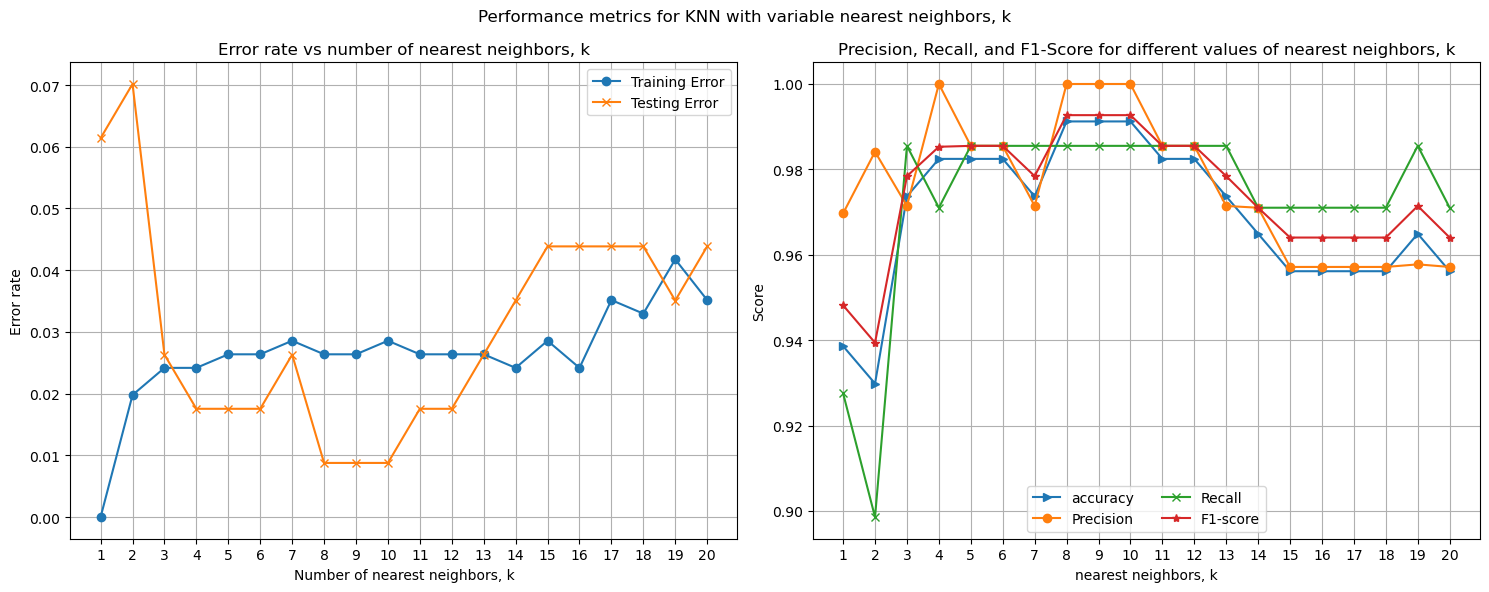

In [13]:
# training and testing KNN
# creating a dictionary to store metrics for all models
knn_metrics = {}

# initialize metric lists
accuracy_ls = []
train_err_ls = []
test_err_ls = []
precision_ls = []
recall_ls = []
f1_ls = []
cm_ls = []
auroc_ls = []
fpr_ls = []
tpr_ls = []
thresh_ls = []

# range of k values to test
n_range = range(1,21)

# loop through k values, collecting the metrics for each
for k in n_range:
    k_model = neighbors.KNeighborsClassifier(n_neighbors=k)

    # fit model
    k_model.fit(X_train_scaled, y_train)

    # get training accuracy and error rate
    yhat_train = k_model.predict(X_train_scaled)
    train_err_ls.append(1 - metrics.accuracy_score(y_train, yhat_train))

    # measure fit on test data
    yhat_test = k_model.predict(X_test_scaled)

    # accuracy and error rate
    acc = metrics.accuracy_score(y_test, yhat_test)
    accuracy_ls.append(acc)
    test_err_ls.append(1 - acc)
    # precision, recall, and f1 
    precision_ls.append(metrics.precision_score(y_test, yhat_test))
    recall_ls.append(metrics.recall_score(y_test, yhat_test))
    f1_ls.append(metrics.f1_score(y_test, yhat_test))
    
    # metrics for combined AUROC curve later
    # keeping just the p for the positive class
    yhat_p = k_model.predict_proba(X_test_scaled)[:, 1]
    auroc = metrics.roc_auc_score(y_test, yhat_p)
    fpr, tpr, thresh = metrics.roc_curve(y_test, yhat_p)
    auroc_ls.append(auroc)
    fpr_ls.append(fpr)
    tpr_ls.append(tpr)
    thresh_ls.append(thresh)

    print(f"KNN for {k} neighbors: Accuracy {acc}; AUC {auroc};")
    #generate confusion matrix
    cm = metrics.confusion_matrix(y_test, yhat_test)
    cm_ls.append(cm)
    # plt.figure(figsize=(8, 6))
    # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    # plt.title('Confusion Matrix')
    # plt.ylabel('True Label')
    # plt.xlabel('Predicted Label')
    # plt.show()

knn_metrics['accuracy'] = accuracy_ls
knn_metrics['train_err'] = train_err_ls
knn_metrics['test_err'] = test_err_ls
knn_metrics['precision'] = precision_ls
knn_metrics['recall'] = recall_ls
knn_metrics['f1'] = f1_ls
knn_metrics['auroc'] = auroc_ls
knn_metrics['fpr'] = fpr_ls
knn_metrics['tpr'] = tpr_ls
knn_metrics['thresh'] = thresh_ls
knn_metrics['cm'] = cm_ls
knn_metrics['n_range'] = n_range
knn_metrics['key_hyperparameter'] = "nearest neighbors, k"

plot_metrics(knn_metrics, "KNN")

The suggested default `k=5` appears to be a good start but the best `n_neighbors`, k for KNN appears to be 8
- the least number of k before testing error increases 
- also the number of k where precision, recall, and F1 (balance of precision and recall) are collectively the highest
- AUC is high
- smallest k value with the best metrics, which helps prevent over-smoothing of decision boundaries 



In [14]:
knn_metrics['best'] = 8

## Decision tree
- starting test with the default `max_depth=None` for the decision tree
- then testing `max_depth` from 1 to 21

In [15]:
## decision tree with default values
# creating a dictionary to store metrics for all models
dt0_metrics = {}

# initialize metric lists
accuracy_ls = []
train_err_ls = []
test_err_ls = []
precision_ls = []
recall_ls = []
f1_ls = []
cm_ls = []
auroc_ls = []
fpr_ls = []
tpr_ls = []
thresh_ls = []

# no max_depth set, using default
dt_model = tree.DecisionTreeClassifier()

# fit model
dt_model.fit(X_train_scaled, y_train)

# get training accuracy and error rate
yhat_train = dt_model.predict(X_train_scaled)
train_err_ls.append(1 - metrics.accuracy_score(y_train, yhat_train))

# measure fit on test data
yhat_test = dt_model.predict(X_test_scaled)

# accuracy and error rate
acc = metrics.accuracy_score(y_test, yhat_test)
accuracy_ls.append(acc)
test_err_ls.append(1 - acc)
# precision, recall, and f1 
precision_ls.append(metrics.precision_score(y_test, yhat_test))
recall_ls.append(metrics.recall_score(y_test, yhat_test))
f1_ls.append(metrics.f1_score(y_test, yhat_test))

# metrics for combined AUROC curve later
# keeping just the p for the positive class
yhat_p = dt_model.predict_proba(X_test_scaled)[:, 1]
auroc = metrics.roc_auc_score(y_test, yhat_p)
fpr, tpr, thresh = metrics.roc_curve(y_test, yhat_p)
auroc_ls.append(auroc)
fpr_ls.append(fpr)
tpr_ls.append(tpr)
thresh_ls.append(thresh)

print(f"DT with No max_depth: Accuracy {acc}; AUC = {auroc}")
#generate confusion matrix
cm = metrics.confusion_matrix(y_test, yhat_test)
cm_ls.append(cm)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.title('Confusion Matrix')
# plt.ylabel('True Label')
# plt.xlabel('Predicted Label')
# plt.show()

dt0_metrics['accuracy'] = accuracy_ls
dt0_metrics['train_err'] = train_err_ls
dt0_metrics['test_err'] = test_err_ls
dt0_metrics['precision'] = precision_ls
dt0_metrics['recall'] = recall_ls
dt0_metrics['f1'] = f1_ls
dt0_metrics['auroc'] = auroc_ls
dt0_metrics['fpr'] = fpr_ls
dt0_metrics['tpr'] = tpr_ls
dt0_metrics['thresh'] = thresh_ls
dt0_metrics['cm'] = cm_ls
dt0_metrics['n_range'] = n_range
dt0_metrics['key_hyperparameter'] = "max_depth"

DT with No max_depth: Accuracy 0.9298245614035088; AUC = 0.9265700483091787


DT with 1 max_depth: Accuracy 0.9473684210526315; AUC = 0.9333333333333333
DT with 2 max_depth: Accuracy 0.9649122807017544; AUC = 0.9650563607085346
DT with 3 max_depth: Accuracy 0.9473684210526315; AUC = 0.9262479871175523
DT with 4 max_depth: Accuracy 0.9385964912280702; AUC = 0.9257648953301127
DT with 5 max_depth: Accuracy 0.9473684210526315; AUC = 0.9201288244766506
DT with 6 max_depth: Accuracy 0.956140350877193; AUC = 0.9273752012882448
DT with 7 max_depth: Accuracy 0.9385964912280702; AUC = 0.9399355877616746
DT with 8 max_depth: Accuracy 0.9298245614035088; AUC = 0.9265700483091787
DT with 9 max_depth: Accuracy 0.9385964912280702; AUC = 0.9338164251207729
DT with 10 max_depth: Accuracy 0.9473684210526315; AUC = 0.9410628019323671
DT with 11 max_depth: Accuracy 0.956140350877193; AUC = 0.9483091787439614
DT with 12 max_depth: Accuracy 0.9298245614035088; AUC = 0.9265700483091787
DT with 13 max_depth: Accuracy 0.956140350877193; AUC = 0.9483091787439614
DT with 14 max_depth: Ac

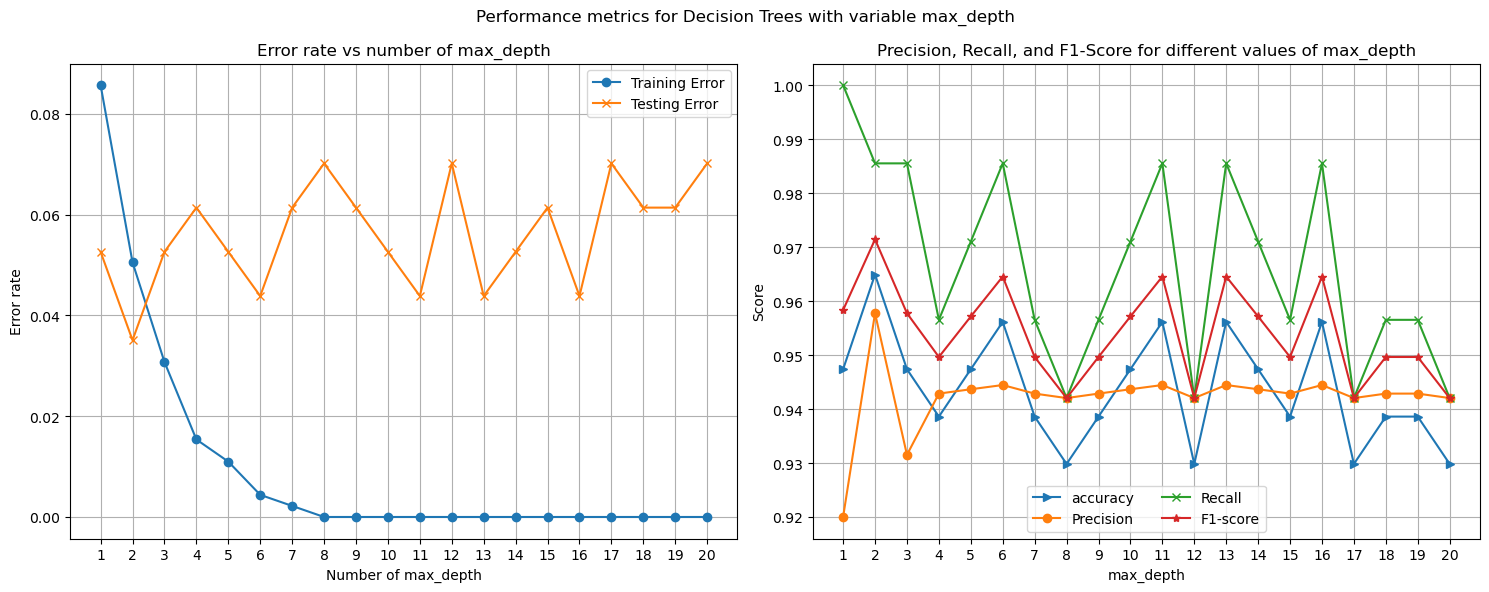

In [21]:
## testing and training DT with max_depth 1-20
# creating a dictionary to store metrics for all models
dt_metrics = {}

# initialize metric lists
accuracy_ls = []
train_err_ls = []
test_err_ls = []
precision_ls = []
recall_ls = []
f1_ls = []
cm_ls = []
auroc_ls = []
fpr_ls = []
tpr_ls = []
thresh_ls = []

# range of k values to test
n_range = range(1,21)

# loop through k values, collecting the metrics for each
for k in n_range:
    dt_model = tree.DecisionTreeClassifier(max_depth=k)

    # fit model
    dt_model.fit(X_train, y_train)

    # get training accuracy and error rate
    yhat_train = dt_model.predict(X_train)
    train_err_ls.append(1 - metrics.accuracy_score(y_train, yhat_train))

    # measure fit on test data
    yhat_test = dt_model.predict(X_test)

    # accuracy and error rate
    acc = metrics.accuracy_score(y_test, yhat_test)
    accuracy_ls.append(acc)
    test_err_ls.append(1 - acc)
    # precision, recall, and f1 
    precision_ls.append(metrics.precision_score(y_test, yhat_test))
    recall_ls.append(metrics.recall_score(y_test, yhat_test))
    f1_ls.append(metrics.f1_score(y_test, yhat_test))
    
    # metrics for combined AUROC curve later
    # keeping just the p for the positive class
    yhat_p = dt_model.predict_proba(X_test)[:, 1]
    auroc = metrics.roc_auc_score(y_test, yhat_p)
    fpr, tpr, thresh = metrics.roc_curve(y_test, yhat_p)
    auroc_ls.append(auroc)
    fpr_ls.append(fpr)
    tpr_ls.append(tpr)
    thresh_ls.append(thresh)

    print(f"DT with {k} max_depth: Accuracy {acc}; AUC = {auroc}")
    #generate confusion matrix
    cm = metrics.confusion_matrix(y_test, yhat_test)
    cm_ls.append(cm)
    # plt.figure(figsize=(8, 6))
    # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    # plt.title('Confusion Matrix')
    # plt.ylabel('True Label')
    # plt.xlabel('Predicted Label')
    # plt.show()

dt_metrics['accuracy'] = accuracy_ls
dt_metrics['train_err'] = train_err_ls
dt_metrics['test_err'] = test_err_ls
dt_metrics['precision'] = precision_ls
dt_metrics['recall'] = recall_ls
dt_metrics['f1'] = f1_ls
dt_metrics['auroc'] = auroc_ls
dt_metrics['fpr'] = fpr_ls
dt_metrics['tpr'] = tpr_ls
dt_metrics['thresh'] = thresh_ls
dt_metrics['cm'] = cm_ls
dt_metrics['n_range'] = n_range
dt_metrics['key_hyperparameter'] = "max_depth"


plot_metrics(dt_metrics, "Decision Trees")

Same rationale as with KNN, `max_depth=2` seems to be the best option here. 

In the error rate figure, testing accuracy is the best at this value. Training error decreases after `max_depth=2` but it's clear that the model is beginning to overfit at that point

In [30]:
dt_metrics['best'] = 2

## Random Forest
- sticking to a constant number of trees: `n_estimators=100`
- testing effect of different `max_depth` and `min_samples_split`

### Varying `max_depth`

RF for max_depth 1: Accuracy 0.9473684210526315; AUC 0.9974235104669886;
RF for max_depth 2: Accuracy 0.9385964912280702; AUC 0.9964573268921095;
RF for max_depth 3: Accuracy 0.956140350877193; AUC 0.9967793880837359;
RF for max_depth 4: Accuracy 0.956140350877193; AUC 0.9983896940418681;
RF for max_depth 5: Accuracy 0.956140350877193; AUC 0.9980676328502416;
RF for max_depth 6: Accuracy 0.956140350877193; AUC 0.9974235104669886;
RF for max_depth 7: Accuracy 0.9736842105263158; AUC 0.9974235104669887;
RF for max_depth 8: Accuracy 0.9824561403508771; AUC 0.9980676328502416;
RF for max_depth 9: Accuracy 0.9824561403508771; AUC 0.9977455716586151;
RF for max_depth 10: Accuracy 0.9824561403508771; AUC 0.9975845410628019;
RF for max_depth 11: Accuracy 0.9824561403508771; AUC 0.9975845410628019;
RF for max_depth 12: Accuracy 0.9824561403508771; AUC 0.9975845410628019;
RF for max_depth 13: Accuracy 0.9824561403508771; AUC 0.9975845410628019;
RF for max_depth 14: Accuracy 0.9824561403508771; A

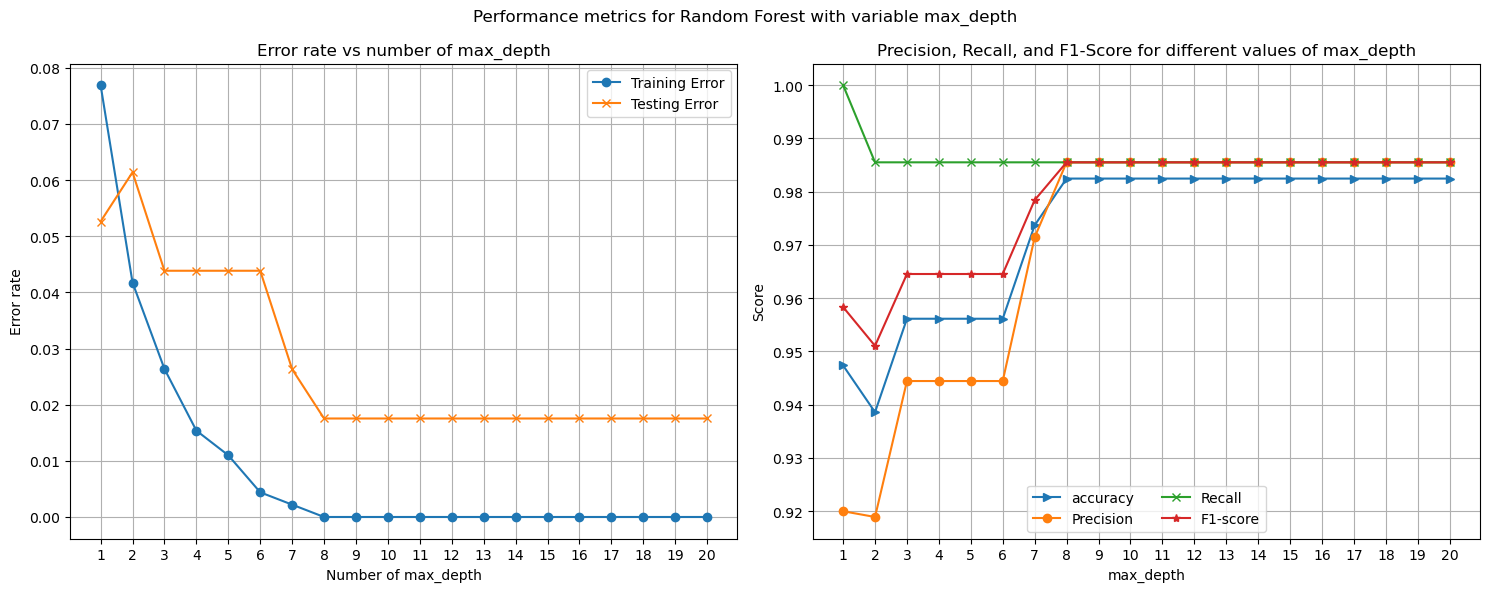

In [25]:
# RF varying max_depth
# creating a dictionary to store metrics for all models
rfmd_metrics = {}

# initialize metric lists
accuracy_ls = []
train_err_ls = []
test_err_ls = []
precision_ls = []
recall_ls = []
f1_ls = []
cm_ls = []
auroc_ls = []
fpr_ls = []
tpr_ls = []
thresh_ls = []

# range of k values to test
n_range = range(1,21)

# loop through k values, collecting the metrics for each
for k in n_range:
    # default value of min_samples_split, which is 2
    model = RandomForestClassifier(max_depth=k,
                                   n_estimators=100,
                                   bootstrap=True,
                                   random_state=89)

    # fit model
    model.fit(X_train, y_train)

    # get training accuracy and error rate
    yhat_train = model.predict(X_train)
    train_err_ls.append(1 - metrics.accuracy_score(y_train, yhat_train))

    # measure fit on test data
    yhat_test = model.predict(X_test)

    # accuracy and error rate
    acc = metrics.accuracy_score(y_test, yhat_test)
    accuracy_ls.append(acc)
    test_err_ls.append(1 - acc)
    # precision, recall, and f1 
    precision_ls.append(metrics.precision_score(y_test, yhat_test))
    recall_ls.append(metrics.recall_score(y_test, yhat_test))
    f1_ls.append(metrics.f1_score(y_test, yhat_test))
    
    # metrics for combined AUROC curve later
    # keeping just the p for the positive class
    yhat_p = model.predict_proba(X_test)[:, 1]
    auroc = metrics.roc_auc_score(y_test, yhat_p)
    fpr, tpr, thresh = metrics.roc_curve(y_test, yhat_p)
    auroc_ls.append(auroc)
    fpr_ls.append(fpr)
    tpr_ls.append(tpr)
    thresh_ls.append(thresh)

    print(f"RF for max_depth {k}: Accuracy {acc}; AUC {auroc};")
    #generate confusion matrix
    cm = metrics.confusion_matrix(y_test, yhat_test)
    cm_ls.append(cm)
    # plt.figure(figsize=(8, 6))
    # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    # plt.title('Confusion Matrix')
    # plt.ylabel('True Label')
    # plt.xlabel('Predicted Label')
    # plt.show()

rfmd_metrics['accuracy'] = accuracy_ls
rfmd_metrics['train_err'] = train_err_ls
rfmd_metrics['test_err'] = test_err_ls
rfmd_metrics['precision'] = precision_ls
rfmd_metrics['recall'] = recall_ls
rfmd_metrics['f1'] = f1_ls
rfmd_metrics['auroc'] = auroc_ls
rfmd_metrics['fpr'] = fpr_ls
rfmd_metrics['tpr'] = tpr_ls
rfmd_metrics['thresh'] = thresh_ls
rfmd_metrics['cm'] = cm_ls
rfmd_metrics['n_range'] = n_range
rfmd_metrics['key_hyperparameter'] = "max_depth"

#plotting
plot_metrics(rfmd_metrics, "Random Forest")

Similar to DT, RF shows complete overfitting of training data (in error rate figure) by `max_depth=8`, which shouldn't be surprising considering RF is an ensemble of DTs. Recall also plateaus at that depth. ROC-AUC is also relatively high for all depths.

However, different from DT, the training accuracy, precision, and F1-score is hits a maximum at a later depth, 8. 

In [26]:
rfmd_metrics['best'] = 8

### Varying `min_samples_split`
- with best value of `max_depth=8`

RF for min_samples_split 2: Accuracy 0.9824561403508771; AUC 0.9980676328502416;
RF for min_samples_split 3: Accuracy 0.9736842105263158; AUC 0.9977455716586152;
RF for min_samples_split 4: Accuracy 0.9649122807017544; AUC 0.9977455716586151;
RF for min_samples_split 5: Accuracy 0.9649122807017544; AUC 0.9980676328502415;
RF for min_samples_split 6: Accuracy 0.956140350877193; AUC 0.9980676328502415;
RF for min_samples_split 7: Accuracy 0.956140350877193; AUC 0.9974235104669887;
RF for min_samples_split 8: Accuracy 0.956140350877193; AUC 0.9974235104669887;
RF for min_samples_split 9: Accuracy 0.9649122807017544; AUC 0.9980676328502416;
RF for min_samples_split 10: Accuracy 0.956140350877193; AUC 0.9980676328502416;
RF for min_samples_split 11: Accuracy 0.956140350877193; AUC 0.998389694041868;
RF for min_samples_split 12: Accuracy 0.9649122807017544; AUC 0.9983896940418681;
RF for min_samples_split 13: Accuracy 0.956140350877193; AUC 0.998389694041868;
RF for min_samples_split 14: Acc

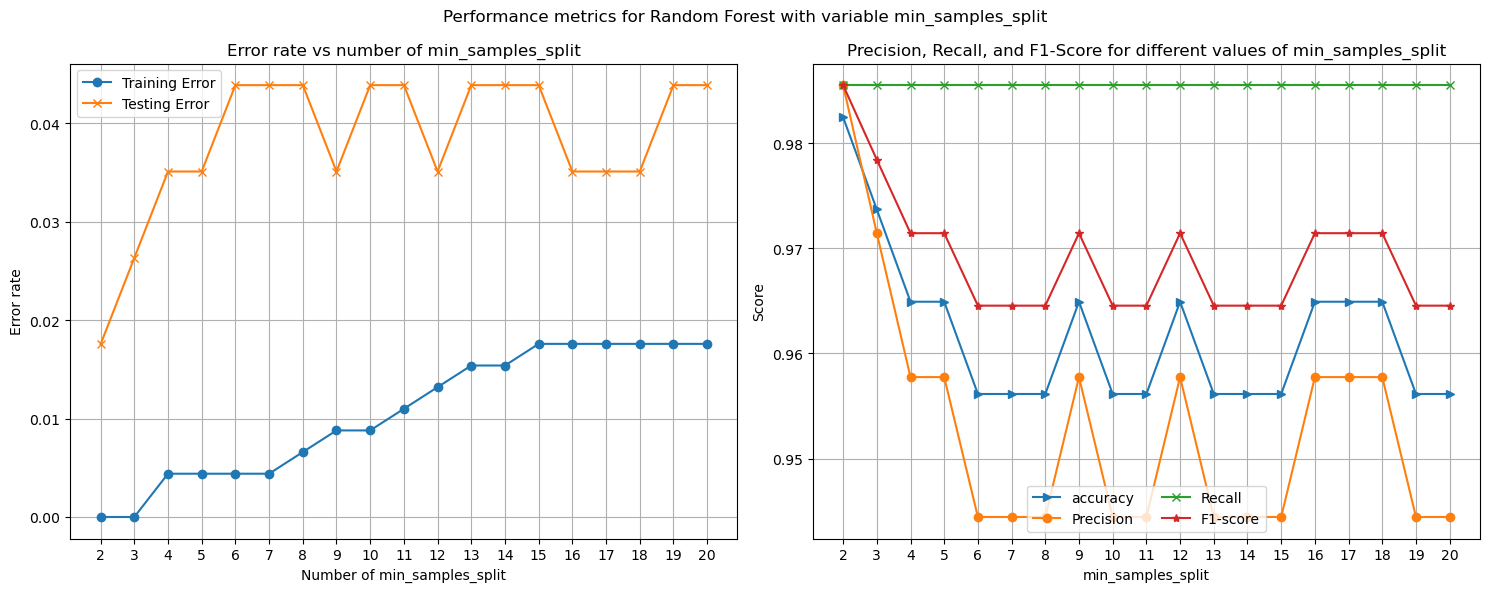

In [27]:
# RF varying min_samples_split
# creating a dictionary to store metrics for all models
rfmss_metrics = {}

# initialize metric lists
accuracy_ls = []
train_err_ls = []
test_err_ls = []
precision_ls = []
recall_ls = []
f1_ls = []
cm_ls = []
auroc_ls = []
fpr_ls = []
tpr_ls = []
thresh_ls = []

# range of k values to test, starting with 2 because split needs to be an integer
n_range = range(2,21)

# loop through k values, collecting the metrics for each
for k in n_range:
    # default value of min_samples_split, which is 2
    model = RandomForestClassifier(max_depth=8,
                                   n_estimators=100,
                                   min_samples_split=k,
                                   bootstrap=True,
                                   random_state=89)

    # fit model
    model.fit(X_train, y_train)

    # get training accuracy and error rate
    yhat_train = model.predict(X_train)
    train_err_ls.append(1 - metrics.accuracy_score(y_train, yhat_train))

    # measure fit on test data
    yhat_test = model.predict(X_test)

    # accuracy and error rate
    acc = metrics.accuracy_score(y_test, yhat_test)
    accuracy_ls.append(acc)
    test_err_ls.append(1 - acc)
    # precision, recall, and f1 
    precision_ls.append(metrics.precision_score(y_test, yhat_test))
    recall_ls.append(metrics.recall_score(y_test, yhat_test))
    f1_ls.append(metrics.f1_score(y_test, yhat_test))
    
    # metrics for combined AUROC curve later
    # keeping just the p for the positive class
    yhat_p = model.predict_proba(X_test)[:, 1]
    auroc = metrics.roc_auc_score(y_test, yhat_p)
    fpr, tpr, thresh = metrics.roc_curve(y_test, yhat_p)
    auroc_ls.append(auroc)
    fpr_ls.append(fpr)
    tpr_ls.append(tpr)
    thresh_ls.append(thresh)

    print(f"RF for min_samples_split {k}: Accuracy {acc}; AUC {auroc};")
    #generate confusion matrix
    cm = metrics.confusion_matrix(y_test, yhat_test)
    cm_ls.append(cm)
    # plt.figure(figsize=(8, 6))
    # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    # plt.title('Confusion Matrix')
    # plt.ylabel('True Label')
    # plt.xlabel('Predicted Label')
    # plt.show()

rfmss_metrics['accuracy'] = accuracy_ls
rfmss_metrics['train_err'] = train_err_ls
rfmss_metrics['test_err'] = test_err_ls
rfmss_metrics['precision'] = precision_ls
rfmss_metrics['recall'] = recall_ls
rfmss_metrics['f1'] = f1_ls
rfmss_metrics['auroc'] = auroc_ls
rfmss_metrics['fpr'] = fpr_ls
rfmss_metrics['tpr'] = tpr_ls
rfmss_metrics['thresh'] = thresh_ls
rfmss_metrics['cm'] = cm_ls
rfmss_metrics['n_range'] = n_range
rfmss_metrics['key_hyperparameter'] = "min_samples_split"

#plotting
plot_metrics(rfmss_metrics, "Random Forest")

The effect of varying min_samples_split appears to be more pronounced on RF. Outside of AUC, which remains relatively high, precision, accuracy, and F1-score peak at the value of 3

Varying the minimum number of samples required to split an internal node does not appear to afftect recall (true positive rate)]

In [28]:
rfmss_metrics['best'] = 3

# Results comparison
- graphical format (ROC-AUC curve)
- confusion matrix for best value of each

## Plotting ROC curves 
- for the different models, with their best hyperparameters

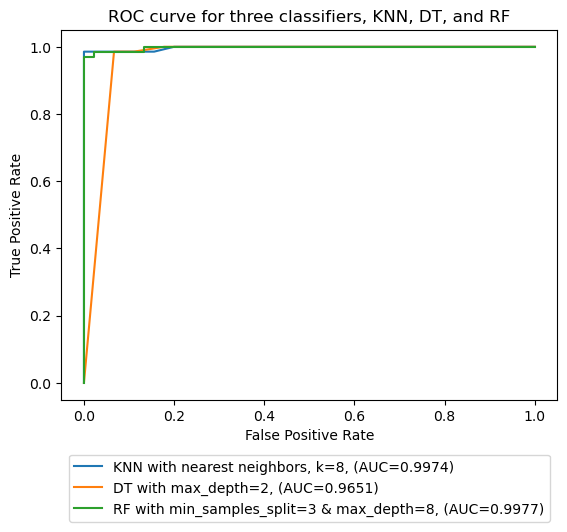

In [49]:
# creating/clearing a new plot with fig ID 0
# plt.figure(0).clf()

# KNN
# getting best performing model, adjusting for 0 based list
best = knn_metrics['best'] - 1
# getting metrics for best models
fpr = knn_metrics['fpr'][best]
tpr = knn_metrics['tpr'][best]
thresh = knn_metrics['thresh'][best]
auroc = knn_metrics['auroc'][best]
plt.plot(fpr, tpr, label=f'''KNN with {knn_metrics['key_hyperparameter']}={best+1}, (AUC={auroc:.4f})''')

# DT
# getting best performing model, adjusting for 0 based list
best = dt_metrics['best'] - 1
# getting metrics for best models
fpr = dt_metrics['fpr'][best]
tpr = dt_metrics['tpr'][best]
thresh = dt_metrics['thresh'][best]
auroc = dt_metrics['auroc'][best]
plt.plot(fpr, tpr, label=f'''DT with {dt_metrics['key_hyperparameter']}={best+1}, (AUC={auroc:.4f})''')

# RF
# getting best performing model, adjusting for 0 based list
best = rfmss_metrics['best'] - 1
# getting metrics for best models
fpr = rfmss_metrics['fpr'][best]
tpr = rfmss_metrics['tpr'][best]
thresh = rfmss_metrics['thresh'][best]
auroc = rfmss_metrics['auroc'][best]
plt.plot(fpr, tpr, label=f'''RF with {rfmss_metrics['key_hyperparameter']}={best+1} & max_depth=8, (AUC={auroc:.4f})''')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'''ROC curve for three classifiers, KNN, DT, and RF''')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.35))
plt.show()

All three models show similar AUC with DT performing slightly poorer than the other two
- RF is expected to have better performance than DT because it is an ensemble of DT
- RF took slightly longer than KNN to classify and iterate through the different key hyperparameters
- also had to tune more hyperparameters for RF
- KNN slightly slower than DT, but performs slightly better
- KNN also consistently has fewer false positives (prevents a false alarm cancer scare)

## Plotting confusion matrix for all three classifiers with the best hyperparameters

Text(0.5, 0.98, 'Confusion matrix of 3 models with best hyperparameters')

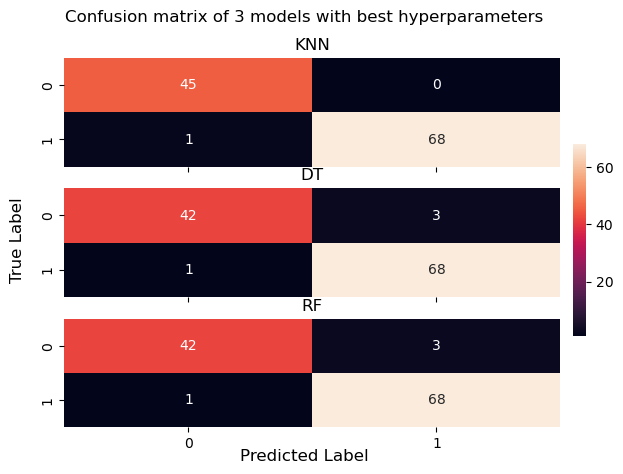

In [67]:
fig, axs = plt.subplots(3, sharex=True, sharey=True)

sns.heatmap(knn_metrics['cm'][knn_metrics['best']-1], cbar=False, annot=True, ax=axs[0])
axs[0].set_title(f'KNN')
sns.heatmap(dt_metrics['cm'][dt_metrics['best']-1], cbar=False, annot=True, ax=axs[1])
axs[1].set_title(f'DT')
sns.heatmap(rfmss_metrics['cm'][rfmss_metrics['best']-1], cbar=False, annot=True, ax=axs[2])
axs[2].set_title(f'RF')

# Add a shared colorbar for all heatmaps
cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])  
sns.heatmap(rfmss_metrics['cm'][rfmss_metrics['best']-1], annot=False, ax=axs[2], cbar=True, cbar_ax=cbar_ax)

fig.text(0.5, 0.04, 'Predicted Label', ha='center', fontsize=12)  # Shared x-label
fig.text(0.04, 0.5, 'True Label', va='center', rotation='vertical', fontsize=12)  # Shared y-label
fig.suptitle("Confusion matrix of 3 models with best hyperparameters")
# plt.ylabel('True Label')
# plt.xlabel('Predicted Label')

Taking a deeper look at the confusion matrix for each classifier, it becomes apparent that KNN has lower false positives than DT or RF, regardless of key hyperparameter optimization.

In [174]:
display(knn_metrics['cm'])
display(dt_metrics['cm'])
display(rfmss_metrics['cm'])

[array([[43,  2],
        [ 5, 64]]),
 array([[44,  1],
        [ 7, 62]]),
 array([[43,  2],
        [ 1, 68]]),
 array([[45,  0],
        [ 2, 67]]),
 array([[44,  1],
        [ 1, 68]]),
 array([[44,  1],
        [ 1, 68]]),
 array([[43,  2],
        [ 1, 68]]),
 array([[45,  0],
        [ 1, 68]]),
 array([[45,  0],
        [ 1, 68]]),
 array([[45,  0],
        [ 1, 68]]),
 array([[44,  1],
        [ 1, 68]]),
 array([[44,  1],
        [ 1, 68]]),
 array([[43,  2],
        [ 1, 68]]),
 array([[43,  2],
        [ 2, 67]]),
 array([[42,  3],
        [ 2, 67]]),
 array([[42,  3],
        [ 2, 67]]),
 array([[42,  3],
        [ 2, 67]]),
 array([[42,  3],
        [ 2, 67]]),
 array([[42,  3],
        [ 1, 68]]),
 array([[42,  3],
        [ 2, 67]])]

[array([[39,  6],
        [ 0, 69]]),
 array([[42,  3],
        [ 1, 68]]),
 array([[40,  5],
        [ 1, 68]]),
 array([[41,  4],
        [ 3, 66]]),
 array([[41,  4],
        [ 3, 66]]),
 array([[41,  4],
        [ 3, 66]]),
 array([[41,  4],
        [ 3, 66]]),
 array([[41,  4],
        [ 2, 67]]),
 array([[41,  4],
        [ 2, 67]]),
 array([[41,  4],
        [ 3, 66]]),
 array([[41,  4],
        [ 1, 68]]),
 array([[41,  4],
        [ 4, 65]]),
 array([[41,  4],
        [ 3, 66]]),
 array([[41,  4],
        [ 3, 66]]),
 array([[41,  4],
        [ 4, 65]]),
 array([[41,  4],
        [ 3, 66]]),
 array([[41,  4],
        [ 2, 67]]),
 array([[41,  4],
        [ 2, 67]]),
 array([[41,  4],
        [ 3, 66]]),
 array([[41,  4],
        [ 3, 66]])]

[array([[41,  4],
        [ 1, 68]]),
 array([[43,  2],
        [ 1, 68]]),
 array([[42,  3],
        [ 1, 68]]),
 array([[42,  3],
        [ 1, 68]]),
 array([[43,  2],
        [ 1, 68]]),
 array([[42,  3],
        [ 1, 68]]),
 array([[43,  2],
        [ 1, 68]]),
 array([[43,  2],
        [ 1, 68]]),
 array([[42,  3],
        [ 1, 68]]),
 array([[41,  4],
        [ 1, 68]]),
 array([[43,  2],
        [ 1, 68]]),
 array([[43,  2],
        [ 1, 68]]),
 array([[41,  4],
        [ 1, 68]]),
 array([[41,  4],
        [ 1, 68]]),
 array([[42,  3],
        [ 1, 68]]),
 array([[42,  3],
        [ 1, 68]]),
 array([[42,  3],
        [ 1, 68]]),
 array([[42,  3],
        [ 1, 68]]),
 array([[41,  4],
        [ 1, 68]])]